In [243]:
from stockstats import StockDataFrame
from IPython.display import Image
from IPython.core.display import display
import seaborn as sns
import pandas as pd
import matplotlib.pylab as plt
sns.set()

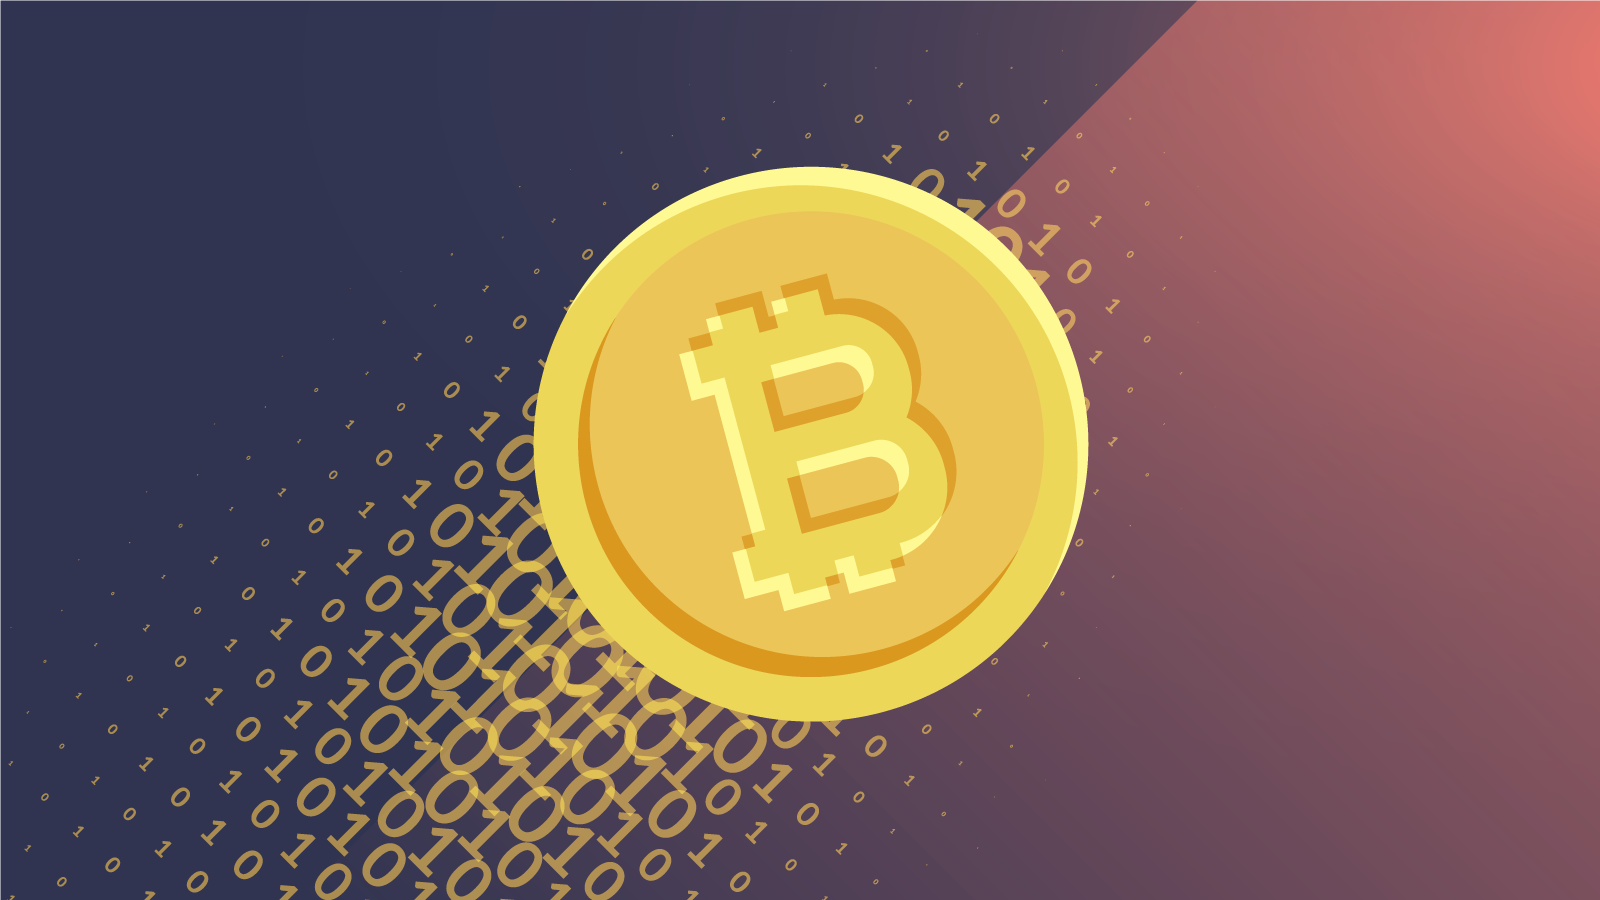

In [244]:
Image('aw-blog-bitcoin01.png')

In [245]:
from stockstats import StockDataFrame
from IPython.display import Image
from IPython.core.display import display
import seaborn as sns
import pandas as pd
import matplotlib.pylab as plt
sns.set()

# Explorando e analisando dataset

In [246]:
#Lendo dataset
bitcoin_df = pd.read_csv('btc_usd.csv')

In [247]:
#Observando formato e colunas para pré processamento
display(bitcoin_df.head(5))
len(bitcoin_df)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-07-18,0.08584,0.07723,0.09307,0.08080,0.08080,4900
1,2010-07-19,0.08080,0.07426,0.08181,0.07474,0.07474,2000
2,2010-07-20,0.07474,0.06634,0.07921,0.07921,0.07921,4200
3,2010-07-21,0.07921,0.05050,0.08181,0.05050,0.05050,12900
4,2010-07-22,0.05050,0.05050,0.06767,0.06262,0.06262,14100


2192

## Analise serie temporal e suas grandezas

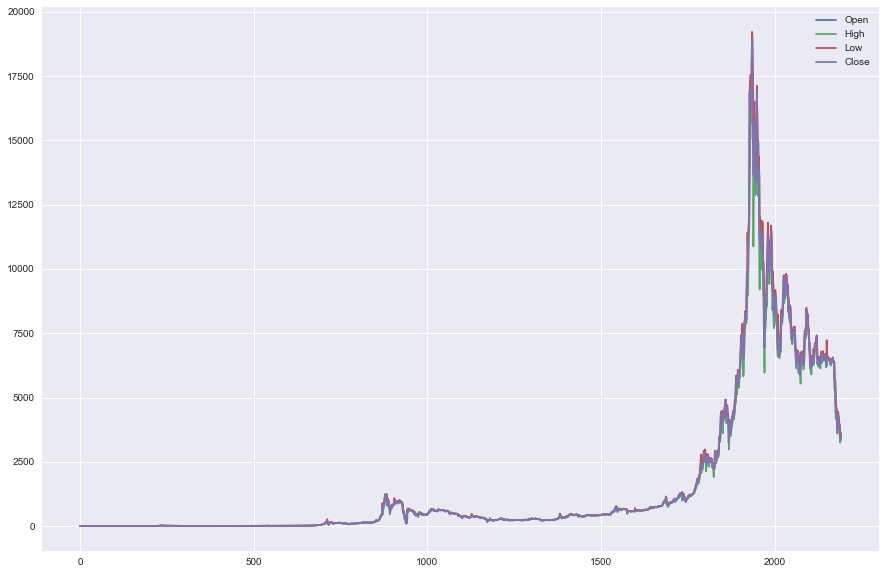

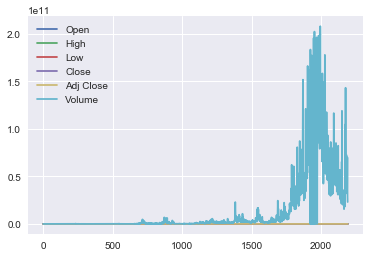

In [248]:
#Analise da serie temporal formada e da grandeza de suas variaveis
chart = bitcoin_df.copy()
chart = chart.drop(columns=['Volume', 'Adj Close'])
chart.plot(figsize=(15,10))
bitcoin_df.plot()

## Indicadores financeiros

In [249]:
bitcoin_df_indicators = StockDataFrame.retype(bitcoin_df)
macdh = bitcoin_df_indicators['macdh']
boll_lb = bitcoin_df_indicators['boll_lb']
volume_delta = bitcoin_df_indicators['volume_delta']
open_2_d = bitcoin_df_indicators['open_2_d']
stock = bitcoin_df_indicators['open_-2_r']
cr = bitcoin_df_indicators['cr']
sma_2 = bitcoin_df_indicators['open_2_sma']
rsi_6 = bitcoin_df_indicators['rsi_6']
rsi_12 = bitcoin_df_indicators['rsi_12']
wr_10 = bitcoin_df_indicators['wr_10']
wr_6= bitcoin_df_indicators['wr_6']
cci = bitcoin_df_indicators['cci']
cci_20 = bitcoin_df_indicators['cci_20']
tr = bitcoin_df_indicators['tr']
atr = bitcoin_df_indicators['atr']
dma = bitcoin_df_indicators['dma']
pdi = bitcoin_df_indicators['pdi']
mdi = bitcoin_df_indicators['mdi']
dx = bitcoin_df_indicators['dx']
adx = bitcoin_df_indicators['adx']
trix = bitcoin_df_indicators['trix']
vr = bitcoin_df_indicators['vr']
change_percentage = bitcoin_df_indicators['close_-1_r']

indicators = []
for column in bitcoin_df_indicators.columns:
    indicators.append(column)
    
display(bitcoin_df_indicators.head(5))

/usr/local/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,open,high,low,close,adj close,volume,close_26_ema,macd,macds,macdh,...,dx_14,dx,dx_6_ema,adx,adx_6_ema,adxr,trix,change,vr,close_-1_r
date,,,,,,,,,,,,,,,,,,,,,
2010-07-18,0.08584,0.07723,0.09307,0.08080,0.08080,4900,0.080800,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-19,0.08080,0.07426,0.08181,0.07474,0.07474,2000,0.077653,-0.000136,-0.000076,-0.000121,...,100.0,100.0,100.0,100.0,100.0,100.0,-1.191949,-7.500000,0.000000,-7.500000
2010-07-20,0.07474,0.06634,0.07921,0.07921,0.07921,4200,0.078213,-0.000035,-0.000059,0.000048,...,100.0,100.0,100.0,100.0,100.0,100.0,-0.559416,5.980733,210.000000,5.980733
2010-07-21,0.07921,0.05050,0.08181,0.05050,0.05050,12900,0.070465,-0.001024,-0.000386,-0.001277,...,100.0,100.0,100.0,100.0,100.0,100.0,-1.438536,-36.245424,28.187919,-36.245424
2010-07-22,0.05050,0.05050,0.06767,0.06262,0.06262,14100,0.068646,-0.001058,-0.000586,-0.000945,...,100.0,100.0,100.0,100.0,100.0,100.0,-1.631813,24.000000,122.818792,24.000000


### Limpeza e preparação do dataset 

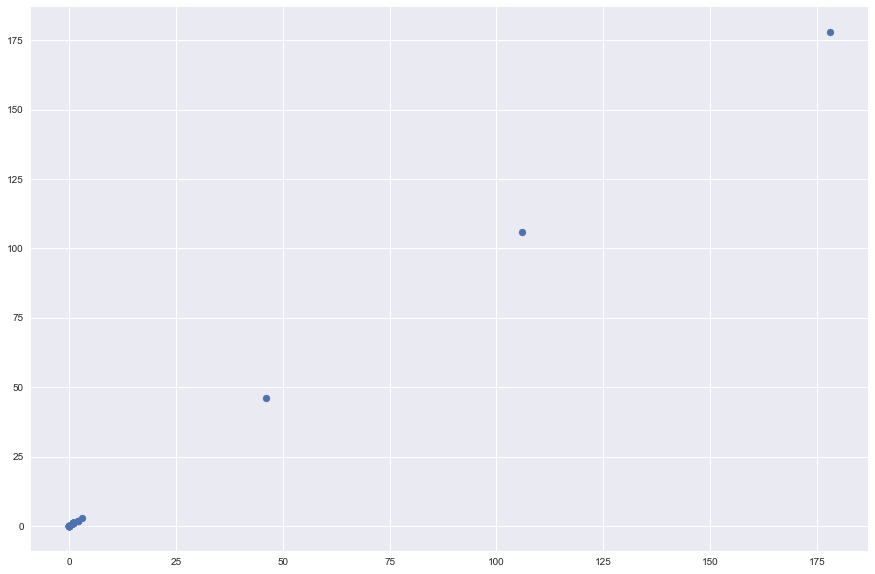

In [250]:
#Limpando o conjunto de dados 
counter_nan = bitcoin_df_indicators.isnull().sum().sort_values(ascending=False)
plt.figure(figsize=(15,10))
plt.scatter(counter_nan, counter_nan.values)
plt.show()

In [251]:
#quantas colunas nao tem um unico nan
counter_without_nan = counter_nan[counter_nan==0]
print("[+] Numero de colunas que nao possuen um nan: " + str(len(counter_without_nan)))
print("[+] Numero de colunas total: " + str(len(bitcoin_df_indicators.columns)))

[+] Numero de colunas que nao possuen um nan: 26
[+] Numero de colunas total: 67


In [252]:
#verificando as colunas com nan
display(bitcoin_df_indicators[counter_nan.keys()].head())

,cr-ma1,cr-ma2,cr-ma3,wr_6,open_2_s,open_2_d,open_-2_r,close_-1_r,rsi_12,atr,...,close_10_sma,close_50_sma,dma,pdm,pdm_14_ema,pdm_14,mdm,mdm_14_ema,mdm_14,open
date,,,,,,,,,,,,,,,,,,,,,
2010-07-18,NaN,NaN,NaN,22.537879,0.07474,0.01110,NaN,NaN,NaN,NaN,...,0.080800,0.080800,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.08584
2010-07-19,NaN,NaN,NaN,-54.366812,0.07921,0.00159,NaN,-7.500000,0.000000,0.006540,...,0.077770,0.077770,0.0,0.0,0.0,0.0,0.01126,0.006032,0.006032,0.08080
2010-07-20,NaN,NaN,NaN,100.000000,0.05050,0.02424,-12.931034,5.980733,44.588529,0.007504,...,0.078250,0.078250,0.0,0.0,0.0,0.0,0.00260,0.004721,0.004721,0.07474
2010-07-21,NaN,NaN,NaN,-1350.000000,0.05050,0.02871,-1.967822,-36.245424,10.811465,0.015103,...,0.071313,0.071313,0.0,0.0,0.0,0.0,0.00000,0.003277,0.003277,0.07921
2010-07-22,0.0,NaN,NaN,152.824268,0.05600,-0.00550,-32.432432,24.000000,33.878802,0.015678,...,0.069574,0.069574,0.0,0.0,0.0,0.0,0.01414,0.006111,0.006111,0.05050


In [253]:
#apagando colunas com todas as linhas iguais a 0
from pandas.util.testing import assert_series_equal
import numpy as np

cols = bitcoin_df_indicators.select_dtypes([np.number]).columns
diff = bitcoin_df_indicators[cols].diff().sum()

bitcoin_df_indicators = bitcoin_df_indicators.drop(diff[diff==0].index, axis=1)
#Como nao é um stock dividends, o adj close vai ser sempre igual
bitcoin_df_indicators = bitcoin_df_indicators.drop('adj close', 1)
display(bitcoin_df_indicators.tail())



,open,high,low,close,volume,close_26_ema,macd,macds,macdh,close_20_sma,...,dx_14,dx,dx_6_ema,adx,adx_6_ema,adxr,trix,change,vr,close_-1_r
date,,,,,,,,,,,,,,,,,,,,,
2018-12-05,3948.439941,3719.190674,3961.800293,3737.529785,32094441500,4904.013968,-634.242390,-581.050468,-106.383844,4837.349158,...,52.153952,52.153952,51.014102,51.014102,55.700752,55.700752,-1.890631,-5.341607,58.862953,-5.341607
2018-12-06,3737.529785,3467.919922,3883.430420,3485.180420,59092356200,4798.915187,-649.849941,-594.810363,-110.079156,4689.305127,...,55.210620,55.210620,52.213107,52.213107,54.704282,54.704282,-1.941196,-6.751769,51.977492,-6.751769
2018-12-07,3485.180420,3247.999756,3576.109375,3420.570313,69993057600,4696.815567,-659.826464,-607.813583,-104.025762,4541.434131,...,65.254326,65.254326,55.939170,55.939170,55.057107,55.057107,-1.992821,-1.853853,45.926358,-1.853853
2018-12-10,3592.840576,3416.769531,3645.490723,3467.159912,28711975800,4605.729963,-656.406890,-617.532244,-77.749290,4396.038171,...,44.694425,44.694425,52.726386,52.726386,54.391187,54.391187,-2.034549,1.362042,47.082915,1.362042
2018-12-11,3467.159912,3348.979736,3483.580078,3401.020508,23067177800,4516.492225,-651.523393,-624.330474,-54.385838,4249.130774,...,51.389114,51.389114,52.344308,52.344308,53.806364,53.806364,-2.067515,-1.907596,44.313452,-1.907596


,cr-ma1,cr-ma2,cr-ma3,wr_6,vr,rsi_12,rs_12,rsi_6,rs_6,close_-1_d,...,low_delta,high_delta,dma,close_50_sma,close_10_sma,atr,tr,cci_20,middle_20_sma,open
date,,,,,,,,,,,,,,,,,,,,,
2010-08-08,0.000000,0.000000,0.0,3433.333333,179.739508,53.559236,1.153281,64.293453,1.800607,0.0087,...,0.01110,-0.00140,-0.001887,0.064167,0.06228,0.007935,0.01120,41.448578,0.064189,0.0609
2010-08-09,0.000000,0.000000,0.0,-63.339383,168.979592,52.431278,1.102222,61.713517,1.611888,-0.0010,...,-0.00260,0.00721,-0.001230,0.064510,0.06328,0.007581,0.00449,51.357086,0.064480,0.0710
2010-08-10,2.180685,0.000000,0.0,-8.892922,99.959759,49.050534,0.962729,53.923745,1.170315,-0.0030,...,0.00451,-0.00651,-0.000558,0.064648,0.06409,0.007822,0.01000,31.842735,0.064646,0.0700
2010-08-11,4.361371,0.000000,0.0,-63.339383,105.352113,52.398860,1.100790,59.984830,1.499052,0.0030,...,-0.00541,0.00141,-0.000830,0.064930,0.06410,0.007606,0.00559,27.342810,0.064777,0.0670
2010-08-12,6.542056,1.090343,0.0,48.905109,96.320824,46.311773,0.862606,46.521570,0.869913,-0.0055,...,-0.00200,0.00309,-0.000628,0.064909,0.06428,0.007407,0.00550,10.214990,0.064822,0.0700


Numero de colunas sem um unico nan: 60


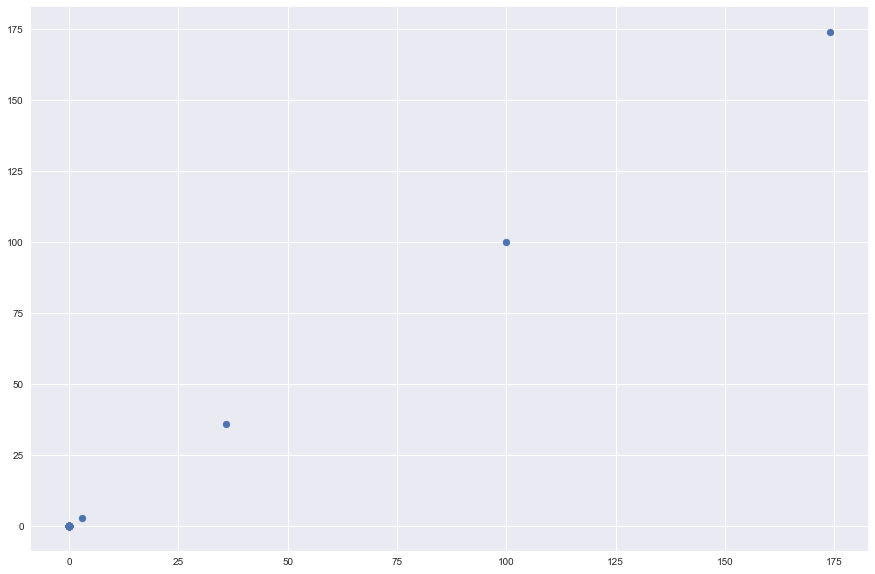

In [254]:
#cortando o indice no comeco e no final pode nos dar uma solucao
#simples para tirar os dados com nan no comeco e no final
bitcoin_df_indicators = bitcoin_df_indicators[15:-15]
counter_nan = bitcoin_df_indicators.isnull().sum().sort_values(ascending=False)
display(bitcoin_df_indicators[counter_nan.keys()].head())
counter_without_nan = counter_nan[counter_nan==0]
plt.figure(figsize=(15,10))
plt.scatter(counter_nan, counter_nan.values)
print("Numero de colunas sem um unico nan: "+ str(len(counter_without_nan)))


In [255]:
#backfilling o numero restante de dados com nan
bitcoin_df_indicators = bitcoin_df_indicators.fillna(method='bfill')
bitcoin_df_indicators = bitcoin_df_indicators[1:-1]
counter_without_nan = bitcoin_df_indicators.isnull().sum().sort_values(ascending=False)
print("Numero de colunas sem um unico nan: " + str(len(counter_without_nan)))

Numero de colunas sem um unico nan: 64


In [256]:
#explorando a distribuicao de mudanca em porcentagem de 1 dia no close
display(bitcoin_df_indicators['close_-1_r'].head(5))

date
2010-08-09   -1.408451
2010-08-10   -4.285714
2010-08-11    4.477612
2010-08-12   -7.857143
2010-08-15    1.550388
Name: close_-1_r, dtype: float64

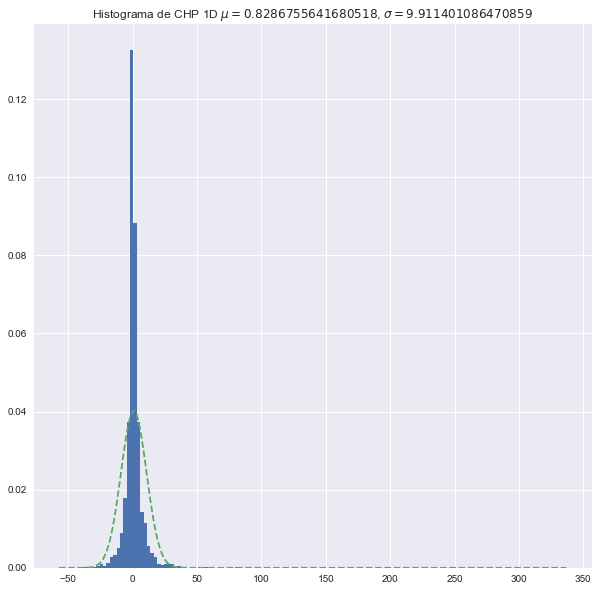

In [257]:
import matplotlib.mlab as mlab

mu = bitcoin_df_indicators['close_-1_r'].mean()
sigma = bitcoin_df_indicators['close_-1_r'].std()
x = bitcoin_df_indicators['close_-1_r']
num_bins = 150
fig, ax = plt.subplots(figsize=(10,10))
n, bins, patches = ax.hist(x, num_bins, normed=1)
y = mlab.normpdf(bins, mu, sigma)
ax.plot(bins, y, '--')
ax.set_title('Histograma de CHP 1D $\mu=' + str(mu) + '$, $\sigma=' + str(sigma) + '$')
plt.show()

#### Criação do dataset com targets para predict 

,close,CHP1D,y
date,,,
2010-08-09,0.0700,-1.408451,0
2010-08-10,0.0670,-4.285714,1
2010-08-11,0.0700,4.477612,0
2010-08-12,0.0645,-7.857143,1
2010-08-15,0.0655,1.550388,1


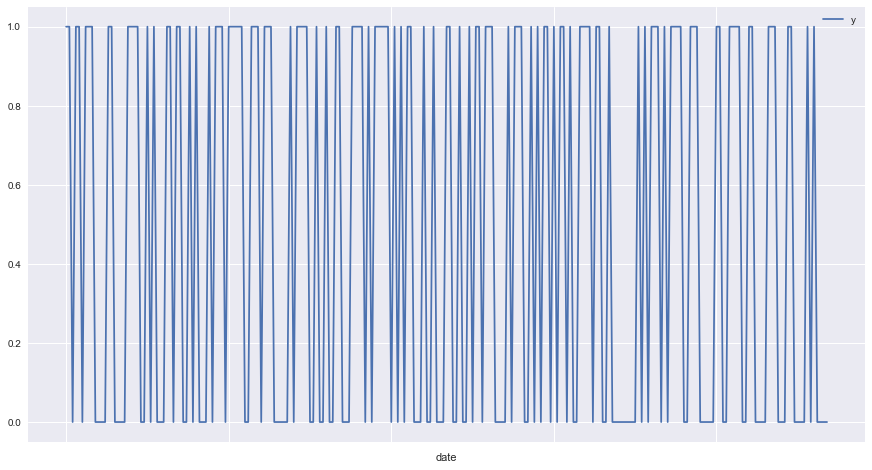

In [258]:
#Making the target label
label_display = pd.DataFrame()
label_display['close'] = bitcoin_df_indicators['close']
label_display['CHP1D'] = bitcoin_df_indicators['close_-1_r']
y1 = bitcoin_df_indicators['close_-1_r'].shift(-1)
y1 = y1.apply(lambda x:1 if x>0.0000 else 0)
label_display['y'] = y1
display(label_display.head(5))
# y é "amanha vai descer = 0, amanha vai subir=1"
plot_label = label_display.copy()
plot_label = plot_label[-250:-15]
plot_label.plot(y='y', figsize=(15,8))

# Engenharia de Features

/usr/local/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


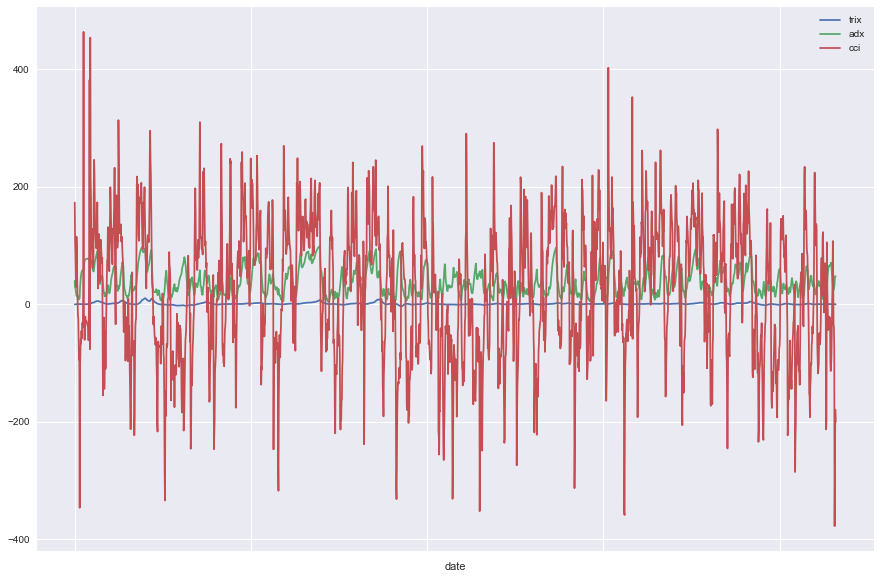

In [259]:
#feature engineering, normalizing and standardizing distributions

bitcoin_df_indicators.plot(x=bitcoin_df_indicators.index, y=['trix','adx', 'cci'], figsize=(15, 10))

#### Normalizando os indicadores financeiros
#### ( ( (xn - xn-1)/xn-1 ) - (Σxi / n) ) / ( √( (Σxi - (Σxi / n)ˆ2 ) / n ) ) 

In [260]:
#Normalizando os indicadores 
normalized_btc_indicators = bitcoin_df_indicators.copy()
normalized_btc_indicators = normalized_btc_indicators.drop(['cr', 'wr_10', 'wr_6'], axis=1)
display(normalized_btc_indicators.head(5))
for feature in normalized_btc_indicators:
    std = normalized_btc_indicators[feature].std()
    mean = normalized_btc_indicators[feature].mean()
    normalized_btc_indicators[feature] = (normalized_btc_indicators[feature]\
                                         - mean)/std

display(normalized_btc_indicators.head(5))

,open,high,low,close,volume,close_26_ema,macd,macds,macdh,close_20_sma,...,dx_14,dx,dx_6_ema,adx,adx_6_ema,adxr,trix,change,vr,close_-1_r
date,,,,,,,,,,,,,,,,,,,,,
2010-08-09,0.07100,0.06651,0.07090,0.0700,8800,0.064082,0.000223,-0.000593,0.001631,0.064510,...,0.543082,0.543082,39.451008,39.451008,56.212314,56.212314,-0.669605,-1.408451,168.979592,-1.408451
2010-08-10,0.07000,0.06000,0.07541,0.0670,101500,0.064370,0.000371,-0.000397,0.001535,0.064648,...,0.543082,0.543082,28.297880,28.297880,48.210518,48.210518,-0.521440,-4.285714,99.959759,-4.285714
2010-08-11,0.06700,0.06141,0.07000,0.0700,13400,0.064913,0.000672,-0.000180,0.001704,0.064930,...,23.974032,23.974032,27.059594,27.059594,42.153207,42.153207,-0.371886,4.477612,105.352113,4.477612
2010-08-12,0.07000,0.06450,0.06800,0.0645,23300,0.064874,0.000538,-0.000035,0.001145,0.064909,...,7.312520,7.312520,21.408116,21.408116,36.216104,36.216104,-0.264795,-7.857143,96.320824,-7.857143
2010-08-15,0.06529,0.06200,0.06790,0.0655,69600,0.064932,0.000494,0.000072,0.000844,0.064143,...,7.775348,7.775348,17.508379,17.508379,30.864644,30.864644,-0.182652,1.550388,121.927888,1.550388


,open,high,low,close,volume,close_26_ema,macd,macds,macdh,close_20_sma,...,dx_14,dx,dx_6_ema,adx,adx_6_ema,adxr,trix,change,vr,close_-1_r
date,,,,,,,,,,,,,,,,,,,,,
2010-08-09,-0.510361,-0.515354,-0.508321,-0.510964,-0.412046,-0.5127,-0.076683,-0.082520,0.002712,-0.509463,...,-1.338309,-1.338309,0.121306,0.121306,0.957010,0.957010,-0.717439,-0.225712,0.212145,-0.225712
2010-08-10,-0.510361,-0.515356,-0.508320,-0.510965,-0.412043,-0.5127,-0.076683,-0.082519,0.002711,-0.509463,...,-1.338309,-1.338309,-0.379494,-0.379494,0.563055,0.563055,-0.630040,-0.516011,-0.377838,-0.516011
2010-08-11,-0.510362,-0.515356,-0.508321,-0.510964,-0.412046,-0.5127,-0.076682,-0.082518,0.002712,-0.509462,...,-0.472016,-0.472016,-0.435096,-0.435096,0.264834,0.264834,-0.541822,0.368155,-0.331744,0.368155
2010-08-12,-0.510361,-0.515355,-0.508322,-0.510966,-0.412046,-0.5127,-0.076682,-0.082518,0.002709,-0.509462,...,-1.088028,-1.088028,-0.688860,-0.688860,-0.027469,-0.027469,-0.478651,-0.876346,-0.408944,-0.876346
2010-08-15,-0.510363,-0.515356,-0.508322,-0.510966,-0.412044,-0.5127,-0.076682,-0.082517,0.002707,-0.509463,...,-1.070916,-1.070916,-0.863967,-0.863967,-0.290939,-0.290939,-0.430197,0.072816,-0.190054,0.072816


/usr/local/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


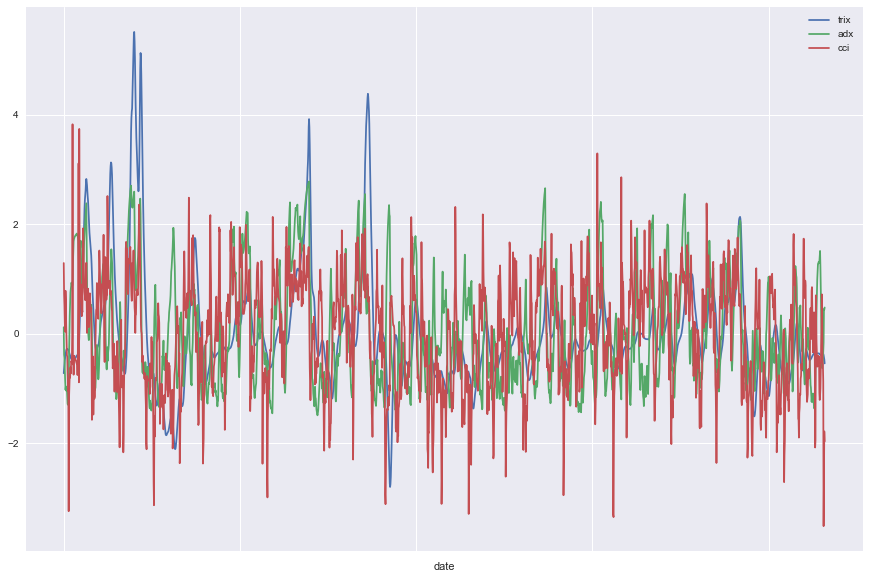

In [261]:
normalized_btc_indicators.plot(x=normalized_btc_indicators.index, y=['trix','adx', 'cci'], figsize=(15, 10))

In [262]:
#Retirando indice de datas e preparando para SVC
normalized_btc_indicators.to_csv('normalized_btc_indicators.csv', \
                                mode='w', header=True)
normalized_btc_indicators = pd.read_csv('normalized_btc_indicators.csv')
normalized_btc_indicators = normalized_btc_indicators.drop('date', axis=1)
display(normalized_btc_indicators.tail(5))

,open,high,low,close,volume,close_26_ema,macd,macds,macdh,close_20_sma,...,dx_14,dx,dx_6_ema,adx,adx_6_ema,adxr,trix,change,vr,close_-1_r
2155,1.622696,1.708273,1.549860,1.611416,0.340832,1.704752,-0.208256,-0.222038,0.001015,1.675135,...,0.095869,0.095869,-0.313960,-0.313960,-0.257565,-0.257565,-0.364434,-0.140442,-0.609155,-0.140442
2156,1.610680,1.410528,1.545437,1.411302,3.044902,1.686795,-0.396500,-0.262228,-0.490547,1.660984,...,0.185804,0.185804,-0.159894,-0.159894,-0.234411,-0.234411,-0.386074,-1.034900,-0.706215,-1.034900
2157,1.410371,1.350962,1.349378,1.379840,2.302222,1.667773,-0.568139,-0.330925,-0.840410,1.646694,...,1.633162,1.633162,0.452381,0.452381,-0.026064,-0.026064,-0.422092,-0.248742,-0.751038,-0.248742
2158,1.379250,1.416844,1.320220,1.359340,0.901322,1.648600,-0.715128,-0.417180,-1.055884,1.631695,...,0.345242,0.345242,0.442816,0.442816,0.119759,0.119759,-0.466340,-0.192995,-0.728801,-0.192995
2159,1.368464,1.159517,1.300711,1.099311,3.132753,1.611058,-1.052777,-0.558075,-1.726479,1.603265,...,0.478979,0.478979,0.482391,0.482391,0.236316,0.236316,-0.538385,-1.486320,-0.847228,-1.486320


In [263]:
label_display.to_csv('label_display.csv', mode='w', header=True)
label_display = pd.read_csv('label_display.csv')
label_display = label_display.drop('date', axis=1)
label_display = label_display.drop('CHP1D', axis=1)
label_display = label_display.drop('close', axis=1)
display(label_display.tail(5))

,y
2155,0
2156,0
2157,0
2158,0
2159,0


In [293]:
#80% para treino, 20% para testes

x_train = normalized_btc_indicators[:1000]
x_test = normalized_btc_indicators[1000:]
y_train = label_display[:1000]
y_test = label_display[1000:]

display(x_train.tail(5))
display(x_test.head(5))

,open,high,low,close,volume,close_26_ema,macd,macds,macdh,close_20_sma,...,dx_14,dx,dx_6_ema,adx,adx_6_ema,adxr,trix,change,vr,close_-1_r
995,-0.291060,-0.293061,-0.290435,-0.286857,-0.402513,-0.330993,0.084740,0.008915,0.249441,-0.335792,...,1.688572,1.688572,1.654886,1.654886,1.320808,1.320808,0.372474,0.130958,0.787295,0.130958
996,-0.286395,-0.303384,-0.292590,-0.297069,-0.400137,-0.328173,0.092638,0.026680,0.220731,-0.332524,...,1.311012,1.311012,1.636867,1.636867,1.455875,1.455875,0.461693,-0.543293,0.239106,-0.543293
997,-0.296601,-0.291593,-0.294004,-0.289954,-0.406011,-0.325021,0.103182,0.043137,0.204679,-0.328803,...,1.562161,1.562161,1.711145,1.711145,1.575620,1.575620,0.536215,0.251952,0.542128,0.251952
998,-0.289490,-0.287533,-0.294504,-0.293225,-0.398892,-0.322352,0.106503,0.057010,0.172962,-0.325321,...,1.630881,1.630881,1.788046,1.788046,1.685243,1.685243,0.588135,-0.232921,0.059540,-0.232921
999,-0.292545,-0.290364,-0.298279,-0.295254,-0.405017,-0.320035,0.105225,0.067836,0.135570,-0.321820,...,1.002232,1.002232,1.624836,1.624836,1.712416,1.712416,0.616123,-0.177614,0.018333,-0.177614


,open,high,low,close,volume,close_26_ema,macd,macds,macdh,close_20_sma,...,dx_14,dx,dx_6_ema,adx,adx_6_ema,adxr,trix,change,vr,close_-1_r
1000,-0.294787,-0.289449,-0.295277,-0.291481,-0.404306,-0.317602,0.105485,0.076552,0.109675,-0.318054,...,1.033642,1.033642,1.519157,1.519157,1.698719,1.698719,0.628571,0.092860,0.230181,0.092860
1001,-0.291016,-0.289237,-0.294761,-0.295723,-0.403808,-0.315672,0.099864,0.082329,0.073592,-0.314651,...,1.041758,1.041758,1.446488,1.446488,1.666170,1.666170,0.621478,-0.278588,-0.032265,-0.278588
1002,-0.295255,-0.307250,-0.300959,-0.311064,-0.402363,-0.315053,0.079893,0.082697,0.007228,-0.312119,...,-0.098754,-0.098754,0.998828,0.998828,1.502682,1.502682,0.580760,-0.802631,-0.270228,-0.802631
1003,-0.310587,-0.305930,-0.308903,-0.306638,-0.396796,-0.314142,0.066373,0.080114,-0.029007,-0.309457,...,-1.172836,-1.172836,0.306368,0.306368,1.168975,1.168975,0.525245,0.139763,-0.036882,0.139763
1004,-0.315552,-0.311007,-0.313090,-0.310411,-0.404098,-0.313587,0.050815,0.074734,-0.063318,-0.306821,...,-1.091770,-1.091770,-0.160117,-0.160117,0.784476,0.784476,0.457251,-0.269906,-0.192873,-0.269906


In [294]:
from sklearn.svm import SVC

model = SVC(C=70,
           kernel='rbf',
           degree=3,
           gamma='auto',
           coef0=0.0,
           probability=False,
           shrinking=True,
           tol=0.001,
           decision_function_shape='ovr',
           random_state=42)

In [295]:
model.fit(x_train, y_train.values.ravel())
acc = model.score(x_test, y_test)
print(acc)

0.5612068965517242


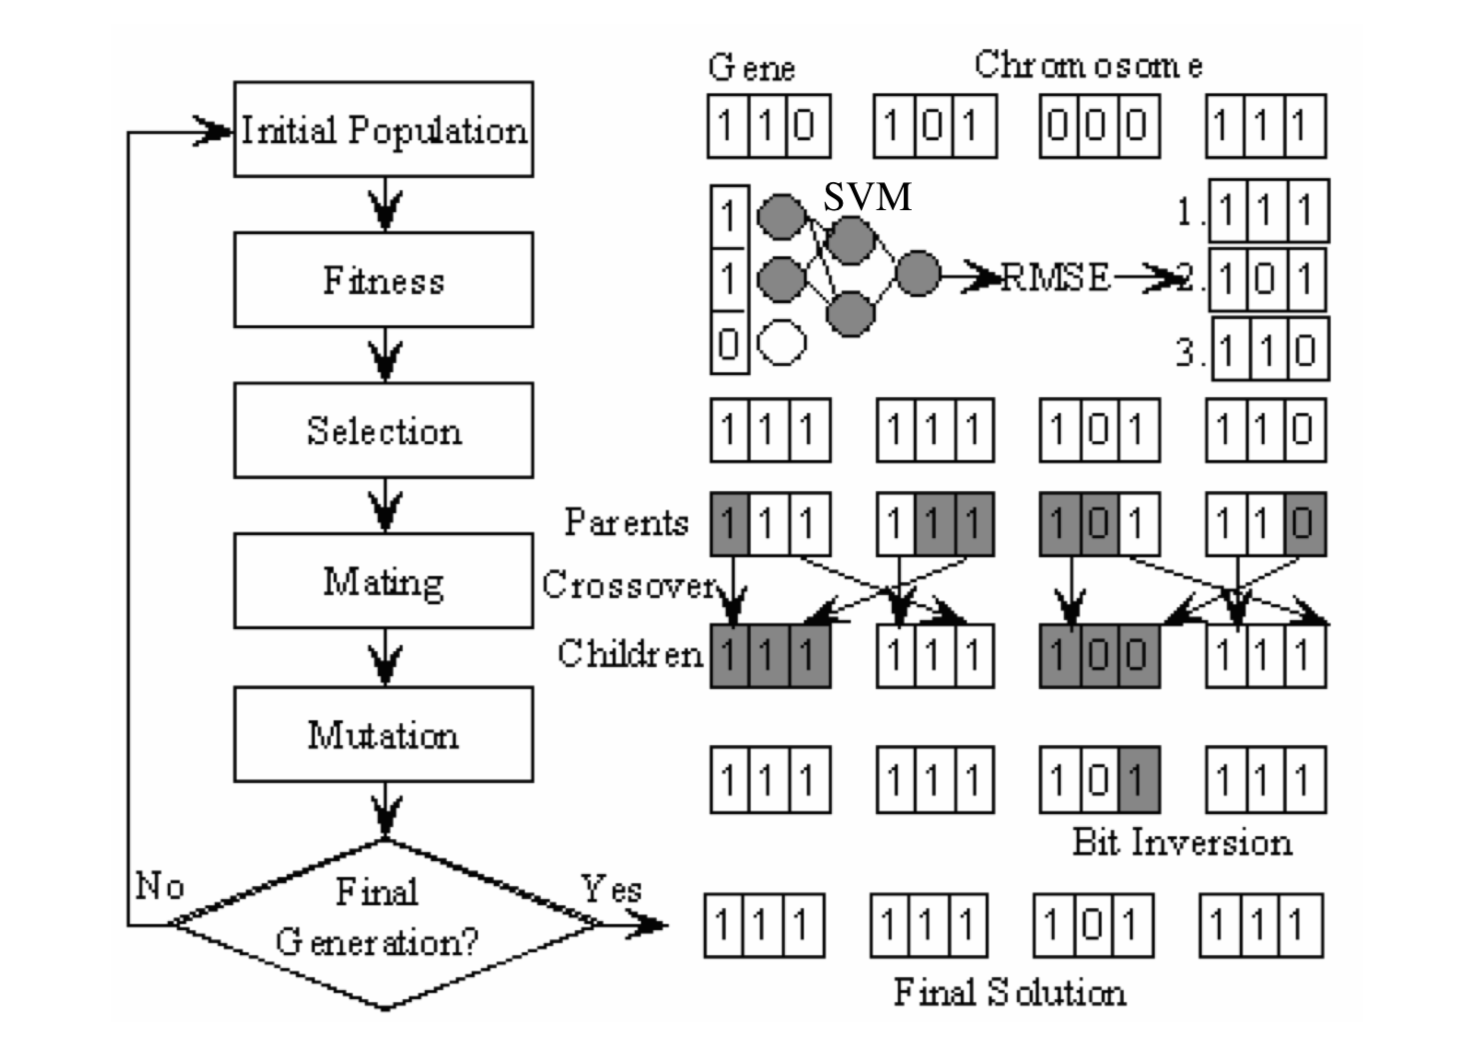

In [233]:
#Feature Selection
#Algoritmo genetico separa e classifica as melhores features que serao usadas como input
#Em uma Suport Vector Machine Classifier do tensorflow

from IPython.core.display import Image
Image('1.png')

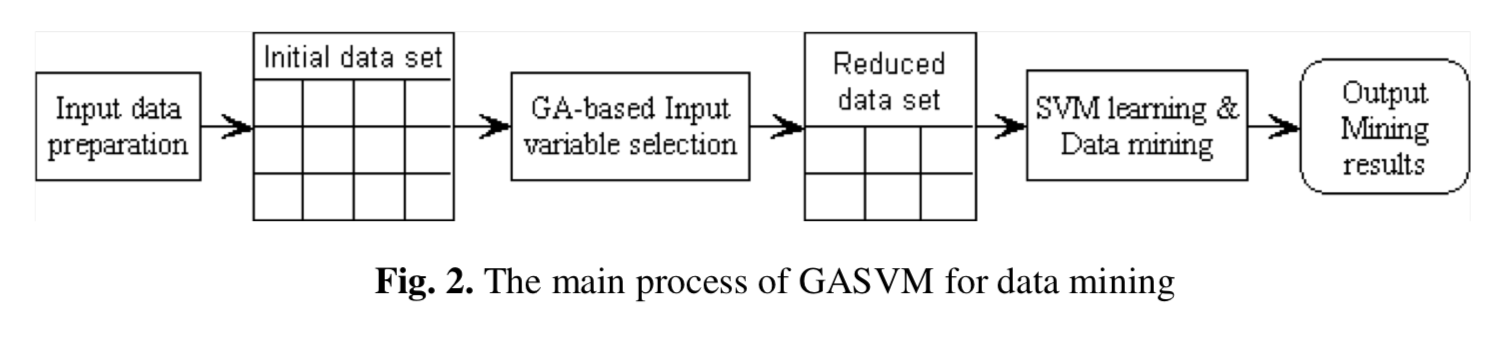

In [234]:
Image('3.png')

In [302]:
x_train.columns[60]

'close_-1_r'

In [313]:
import numpy
class GA:
    def __init__(self, x_test, x_train, y_test,model,
                y_train, retain=0.25,
                random_select=0.1, mutation=0.1,
                population=20,
                generations=20,):
        self.retain = retain
        self.random_select = random_select
        self.mutation = mutation
        self.population = population
        self.generations = generations
        self.actual_generation = 0
        self.x_test = x_test
        self.x_train = x_train
        self.y_test = y_test
        self.y_train = y_train
        self.model = model
        
    def criar_individuo(self):
        individuo = []
        for i in range(0, 61):
            feature = numpy.random.choice(numpy.arange(0,2),
                                         p=[0.5, 0.5])
            individuo.append(feature)
            return individuo
            
        
    def create_population(self):
        population = []
        for i in range(0, self.population):
            population.append(self.criar_individuo())
        return population
    
    def train_and_score(self, individuo):
        n_x_train = self.x_train.copy()
        n_x_test = self.x_test.copy()
        index = 0
        cols = []
        for i in individuo:
            if i == 0:
                cols.append(index)
                index = index + 1
                
                
        n_x_train = n_x_train.drop(n_x_train.columns[cols], axis=1)
        n_x_test = n_x_test.drop(n_x_test.columns[cols], axis=1)
 
        self.model.fit(self.x_train, y_train.values.ravel())
        acc = model.score(x_test, y_test)
        return acc
    
    def breed(self, pai1, pai2):
        filho = []
        for i in range(0, 61):
            if i % 2 == 0:
                filho.append(pai1[i])
            else:
                filho.append(pai2[i])
        return filho
    
    def mutation(self, individuo):
        index = 0
        for i in individuo:
            mutate = numpy.random.choice(numpy.arange(0,2), p=[0.9, self.mutation])
            if mutate == 1:
                if i == 0:
                    individuo[index] = 1
                elif i == 1:
                    individuo[index] = 0
            index = index + 1
        return individuo
    
    def evolve(self, population):
        scores_individuos = []
        for individuo in population:
            score = self.train_and_score(individuo)
            scores_individuos.append(score)
        best_fit = numpy.argsort(scores_individuos)
        best_fit = list(best_fit)
        nova_geracao = []
        for i in range(0, 15):
            filho = self.breed(population[best_fit[i]],
                      population[best_fit[i+1]])
            nova_geracao.append(filho)
        for i in range(0, 5):
            nova_geracao.append(population[best_fit[i]])
        self.actual_generation = self.actual_generation + 1
        print("\n Melhor score da geracao atual( " + str(self.actual_generation) + " )  eh: " + \
             str(score_individuos[best_fit[0]]))
        while self.actual_generation < 20:
            self.evolve(nova_geracao)
        return nova_geracao
            
            
        
            
            
        
                
        

In [314]:
algoritmo_genetico = GA(x_test=x_test, x_train=x_train, y_test=y_test, y_train=y_train, model=model)

In [315]:
population = algoritmo_genetico.create_population()

In [316]:
resultado = algoritmo_genetico.evolve(population)

IndexError: list index out of range

In [309]:
population

[<bound method GA.criar_individuo of <__main__.GA object at 0x115ba6ac8>>,
 <bound method GA.criar_individuo of <__main__.GA object at 0x115ba6ac8>>,
 <bound method GA.criar_individuo of <__main__.GA object at 0x115ba6ac8>>,
 <bound method GA.criar_individuo of <__main__.GA object at 0x115ba6ac8>>,
 <bound method GA.criar_individuo of <__main__.GA object at 0x115ba6ac8>>,
 <bound method GA.criar_individuo of <__main__.GA object at 0x115ba6ac8>>,
 <bound method GA.criar_individuo of <__main__.GA object at 0x115ba6ac8>>,
 <bound method GA.criar_individuo of <__main__.GA object at 0x115ba6ac8>>,
 <bound method GA.criar_individuo of <__main__.GA object at 0x115ba6ac8>>,
 <bound method GA.criar_individuo of <__main__.GA object at 0x115ba6ac8>>,
 <bound method GA.criar_individuo of <__main__.GA object at 0x115ba6ac8>>,
 <bound method GA.criar_individuo of <__main__.GA object at 0x115ba6ac8>>,
 <bound method GA.criar_individuo of <__main__.GA object at 0x115ba6ac8>>,
 <bound method GA.criar_i